### Modules

In [1]:
# general 
import psycopg2 as psyc
import pandas as pd
import numpy as np
import json
import datetime
from collections import Counter
from pprint import pprint

# statistics 
from statsmodels.stats.weightstats import ttest_ind
from scipy.stats import ttest_rel, bartlett, levene

# plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### ETL

In [2]:
# saved database connection data as a hidden json file, for confidentiality 
with open("/Users/lucasramadan/SCL-Work/.db_conn.json", 'r') as f:
    db_conn = json.load(f)

In [3]:
# create the connection
# unpacking the arguments
conn = psyc.connect(**db_conn)

In [4]:
cur = conn.cursor()

In [5]:
# query to gather metrics 
with open('/Users/lucasramadan/SCL-Work/Pickup_Logic_Change_Test/travel_time_arrays.sql') as f:
    q = f.read()

In [6]:
cur.execute(q)

In [7]:
data = cur.fetchall()

In [8]:
data = np.asarray(data)

In [9]:
data[0]

array([datetime.date(2016, 11, 4),
       [18.8, 47.2591666658719, 18.8833333333333, 37.5258333484332, 18.0041666666667, 27.9775000015895, 32.35, 37.5258333484332, 87.9833333333333, 25.8916666666667, 13.1733333349228, 29.2666666666667, 17.9666666666667, 43.3908333341281, 5.22666668494542, 37.5258333484332, 18.2441666841507, 29.2666666666667, 56.0708333333333, 26.85],
       [38.4650000015895, 52.5433333317439, 26.3775000015895, 34.0691666682561, 29.4933333317439, 29.4933333317439, 45.0, 45.0, 15.0441666682561, 45.0, 31.0091666658719, 41.9741666674614, 50.0, 10.0, 41.0, 34.4233333349228, 7.07000000079473, 53.8883333325386, 70.9316666682561, 38.4650000015895],
       [19.2325000007947, 5.25433333317439, 26.3775000015895, 8.51729166706403, 9.83111111058129, 9.83111111058129, 22.5, 11.25, 7.52208333412806, 11.25, 31.0091666658719, 10.4935416668653, 12.5, 10.0, 20.5, 4.30291666686535, 7.07000000079473, 26.9441666662693, 23.6438888894187, 19.2325000007947],
       [38.0325000007947, 52.51349

In [12]:
cols = [c.name for c in cur.description]
cols

['visit_date', 'vtt', 'ptt', 'pttpv', 'ttt']

In [13]:
df = pd.DataFrame(data[:, 1:], index=data[:, 0], columns=cols[1:])
df.head()

,vtt,ptt,pttpv,ttt
2016-11-04,"[18.8, 47.2591666659, 18.8833333333, 37.525833...","[38.4650000016, 52.5433333317, 26.3775000016, ...","[19.2325000008, 5.25433333317, 26.3775000016, ...","[38.0325000008, 52.513499999, 45.2608333349, 4..."
2016-11-05,"[34.4400000016, 54.7166666667, 22.0166666667, ...","[5.0, 52.5433333317, 5.0, 29.225, 5.0, 48.8875...","[1.0, 5.25433333317, 2.5, 29.225, 1.25, 24.443...","[35.4400000016, 59.9709999998, 24.5166666667, ..."
2016-11-06,"[23.2166666667, 58.1166666667, 57.6333333333, ...","[8.01666666667, 5.26666666667, 26.0, 7.0700000...","[8.01666666667, 1.31666666667, 8.66666666667, ...","[31.2333333333, 59.4333333333, 66.3, 26.274166..."
2016-11-07,"[21.2833333333, 47.9141666651, 27.6941666683, ...","[32.85, 53.2041666667, 37.9508333484, 15.63833...","[32.85, 53.2041666667, 37.9508333484, 15.63833...","[54.1333333333, 101.118333332, 65.6450000167, ..."
2016-11-08,"[36.0241666675, 34.0833333333, 35.6275000016, ...","[36.8033333341, 35.6858333349, 39.0841666818, ...","[36.8033333341, 5.0979761907, 19.5420833409, 4...","[72.8275000016, 39.181309524, 55.1695833425, 1..."


### Filtering and Segmentation

In [14]:
logic_change_date = datetime.date(2016, 11, 18)

In [15]:
df = df[df.index < datetime.date.today()]

In [16]:
daily = df.applymap(np.mean)
daily.head()

,vtt,ptt,pttpv,ttt
2016-11-04,31.459125,36.962375,14.863106,46.322231
2016-11-05,35.368269,26.990128,13.510697,48.878966
2016-11-06,30.570036,34.206993,15.937569,46.507605
2016-11-07,32.078551,24.415652,19.539143,51.617693
2016-11-08,34.376316,33.541842,17.510225,51.886541


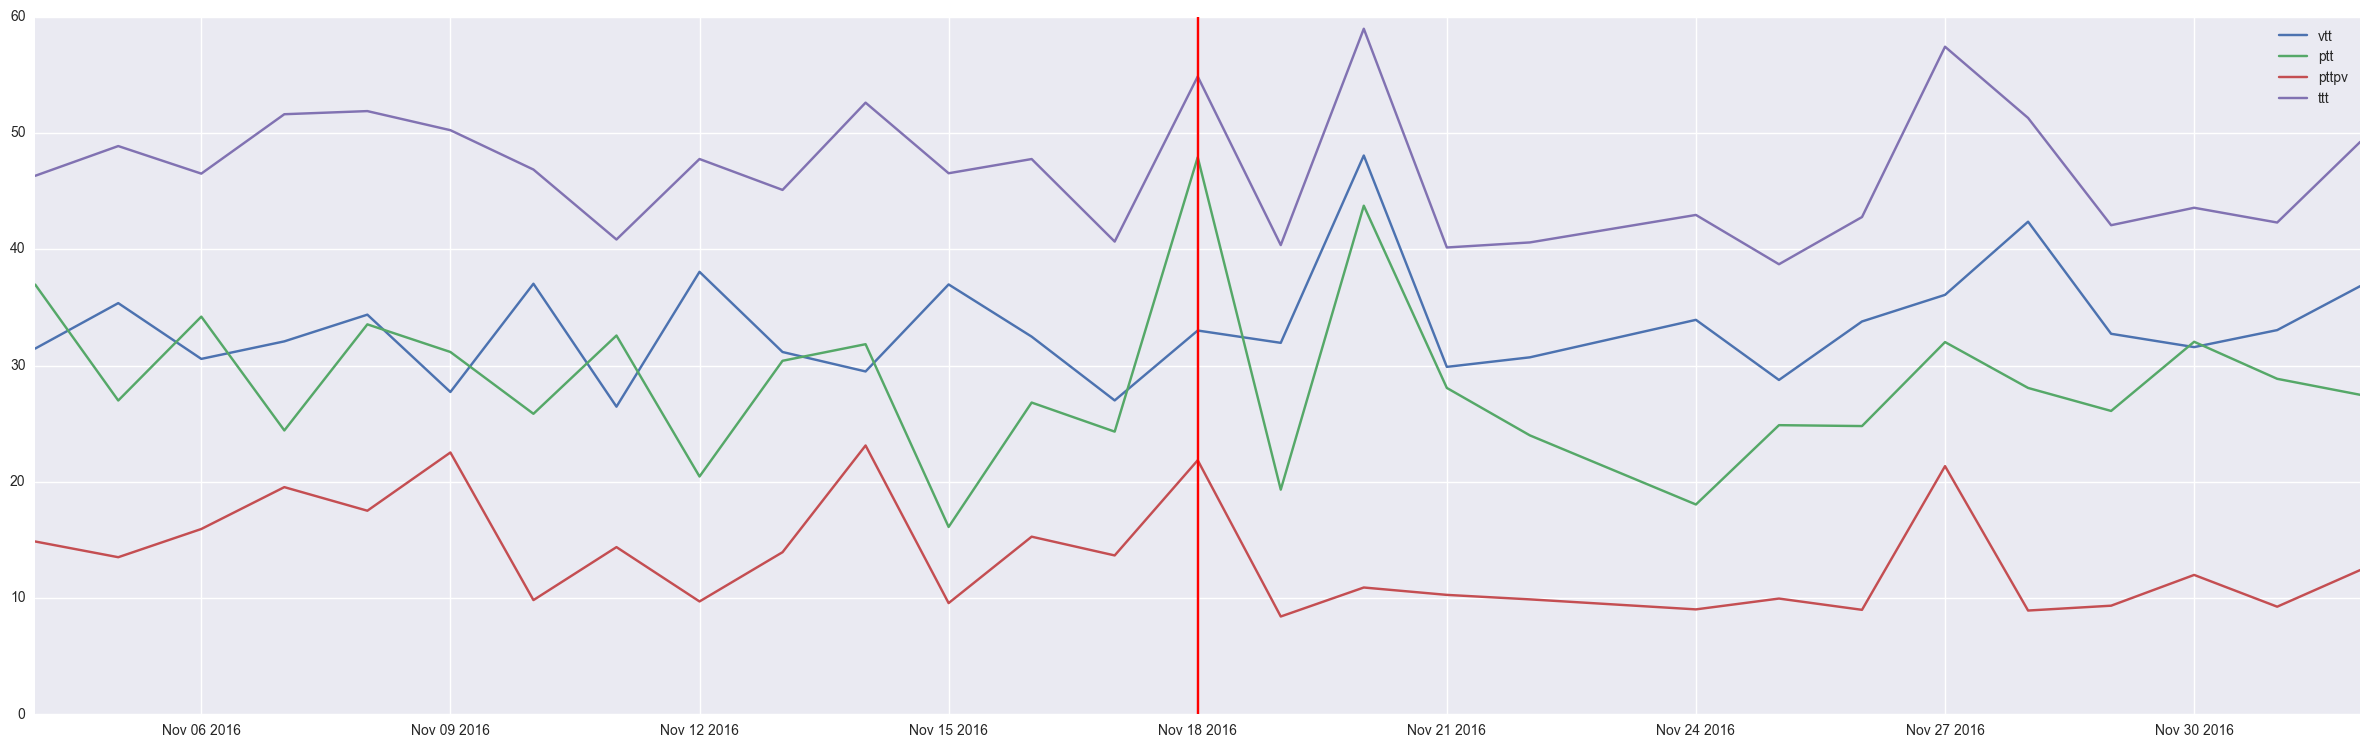

In [17]:
daily.plot(figsize=(30, 9))
plt.axvline(logic_change_date, c='r')

### Statistical Analysis

In [19]:
before = df[df.index < logic_change_date]
after = df[df.index > logic_change_date]

before_samp = daily[daily.index < logic_change_date]
after_samp = daily[daily.index > logic_change_date]

In [29]:
reduce(lambda x,y: x+y, before_samp['vtt'].values)

450.24395120301358

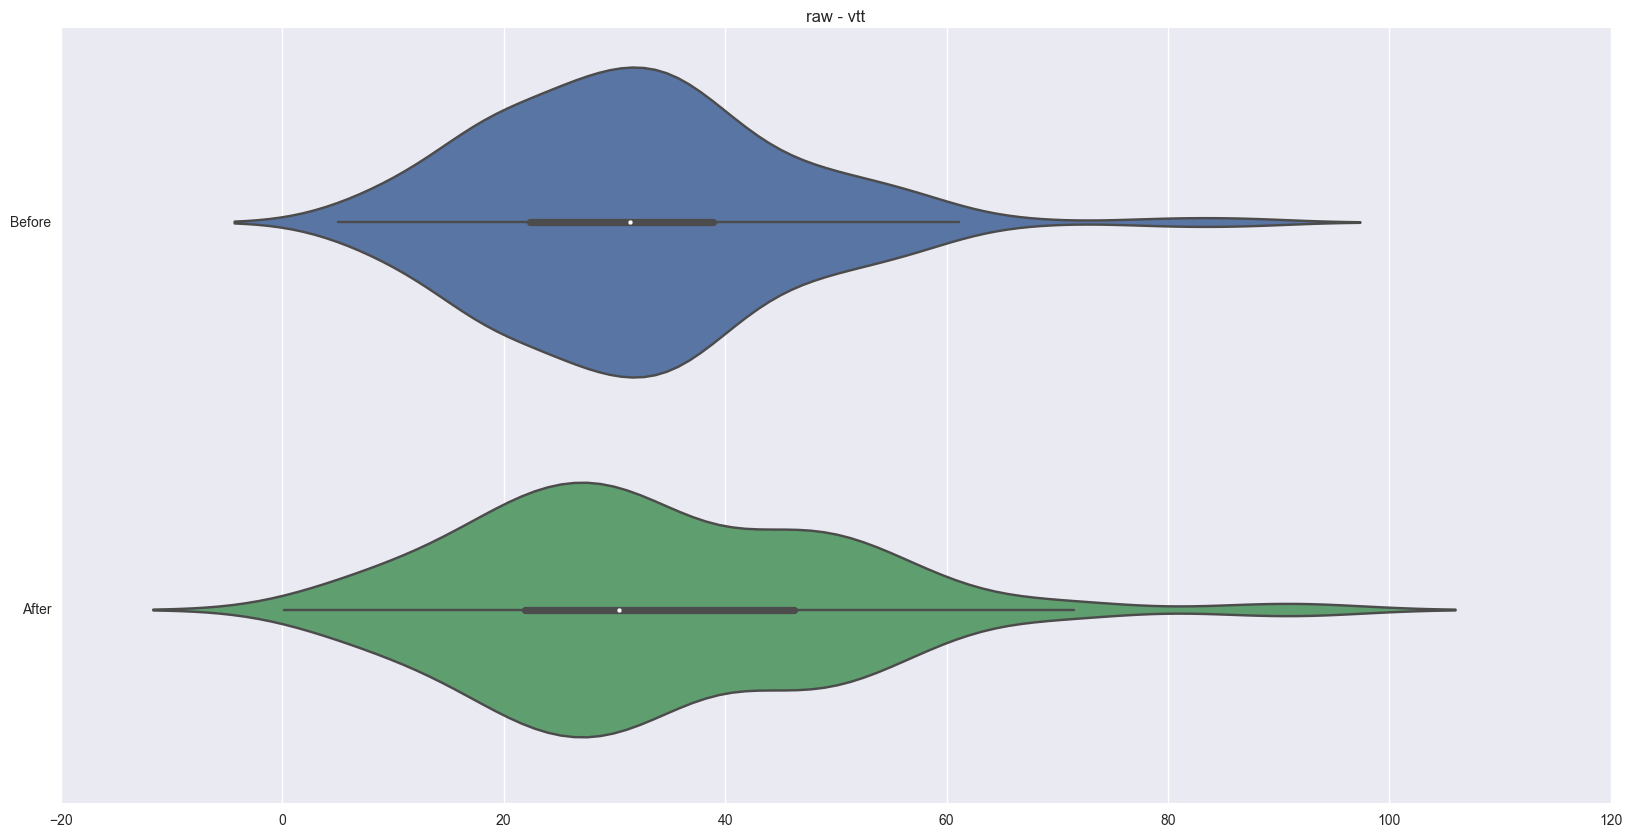

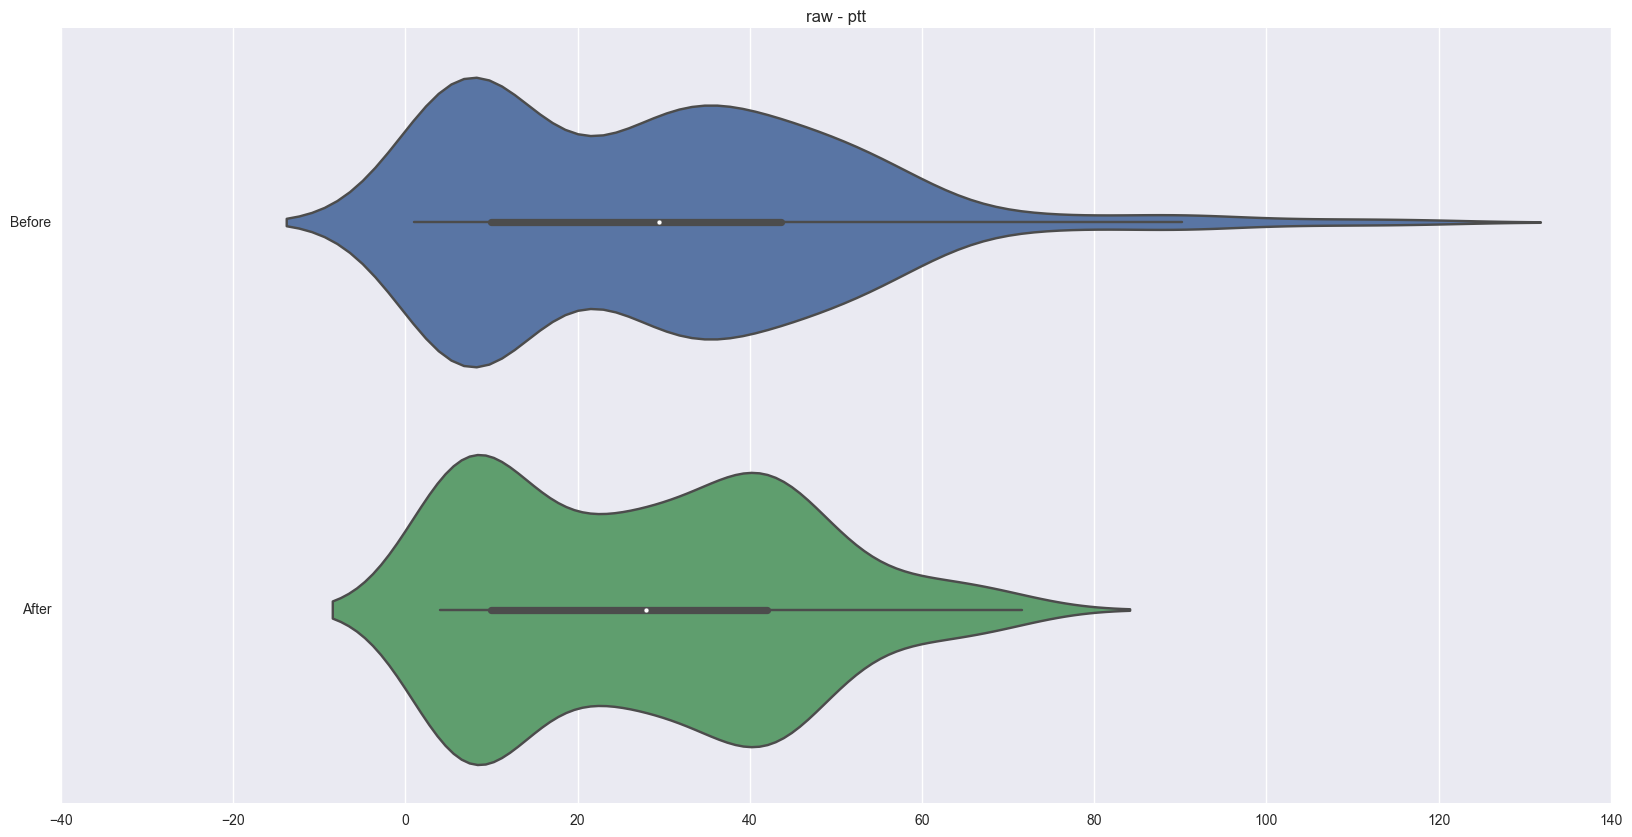

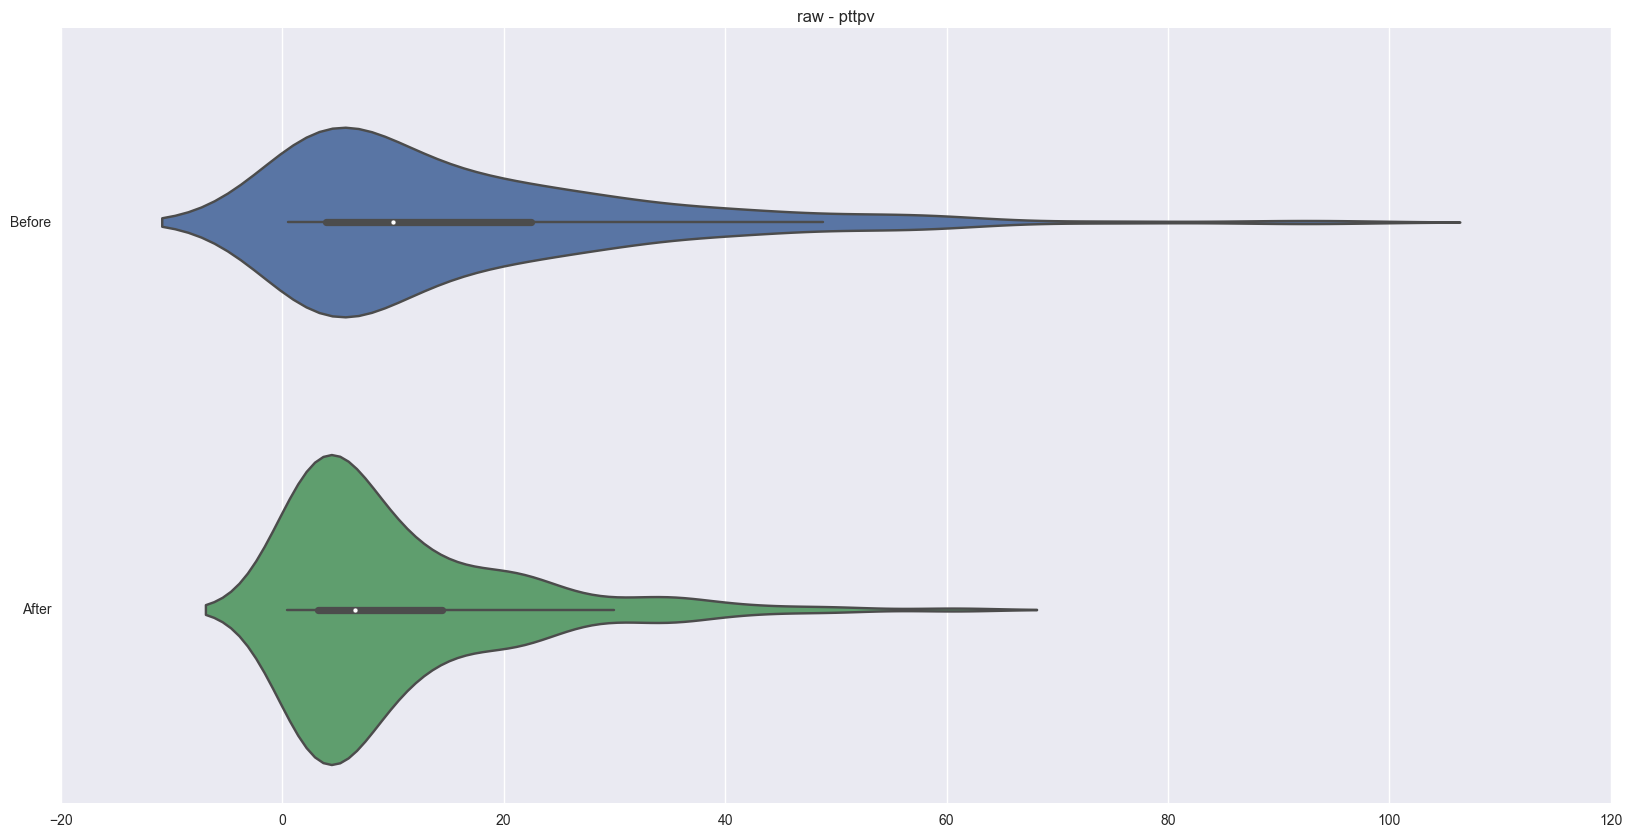

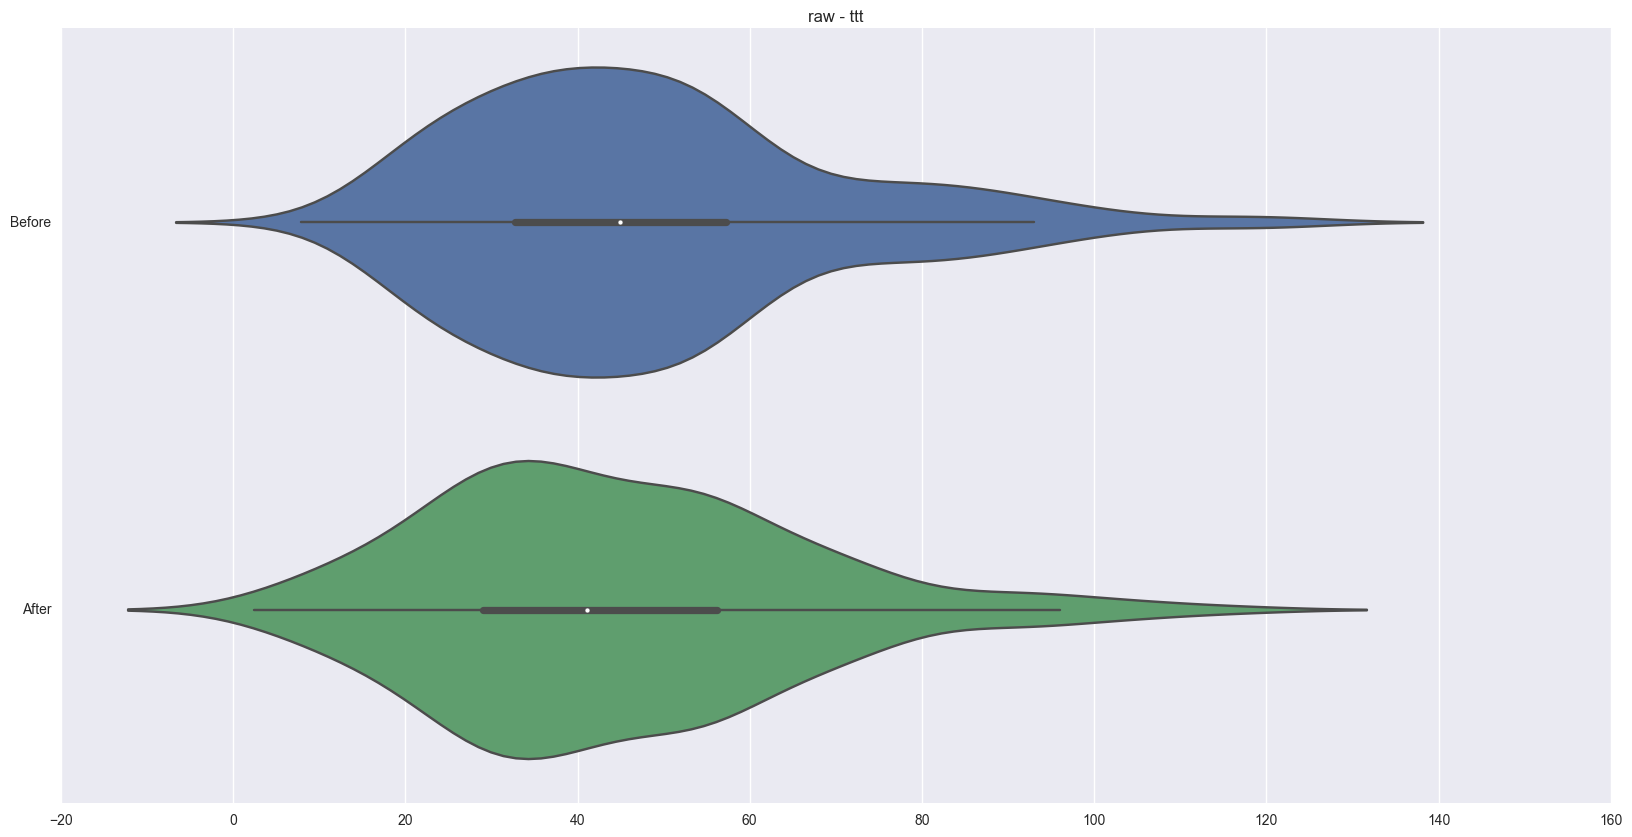

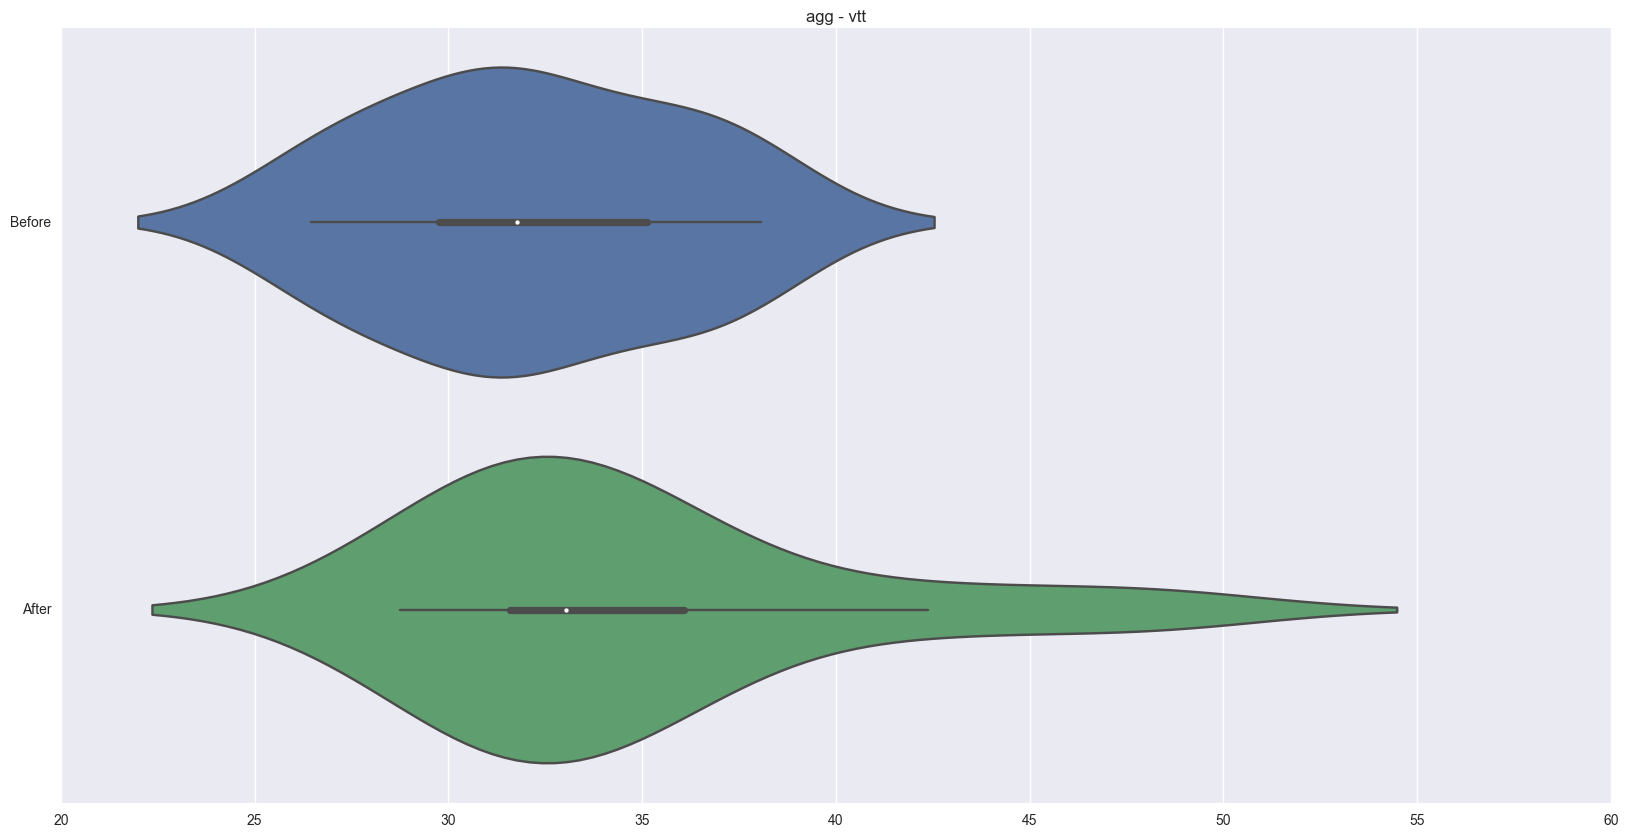

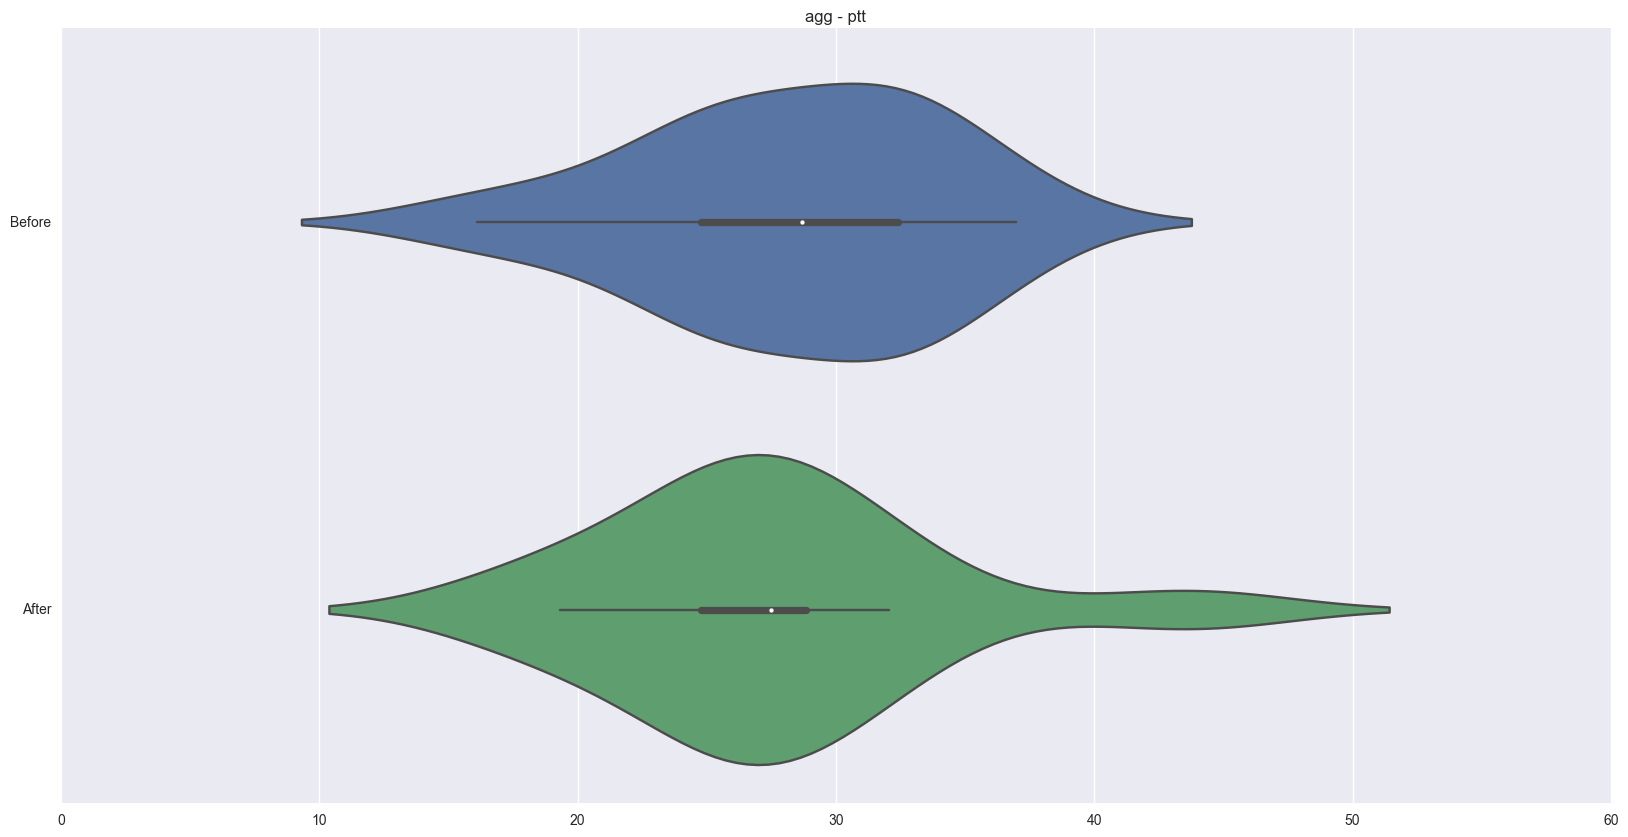

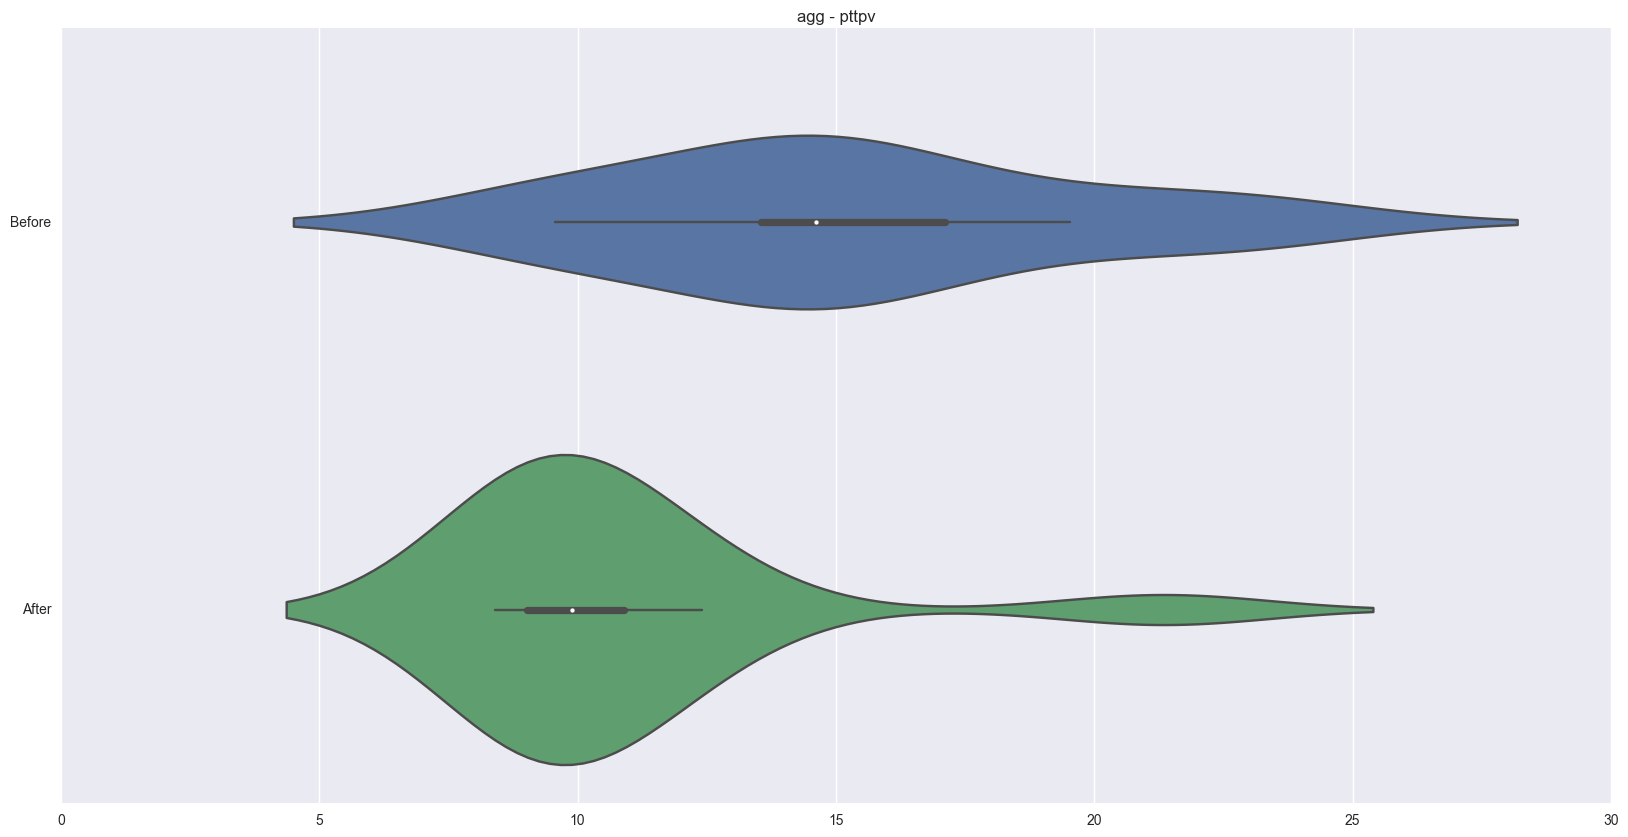

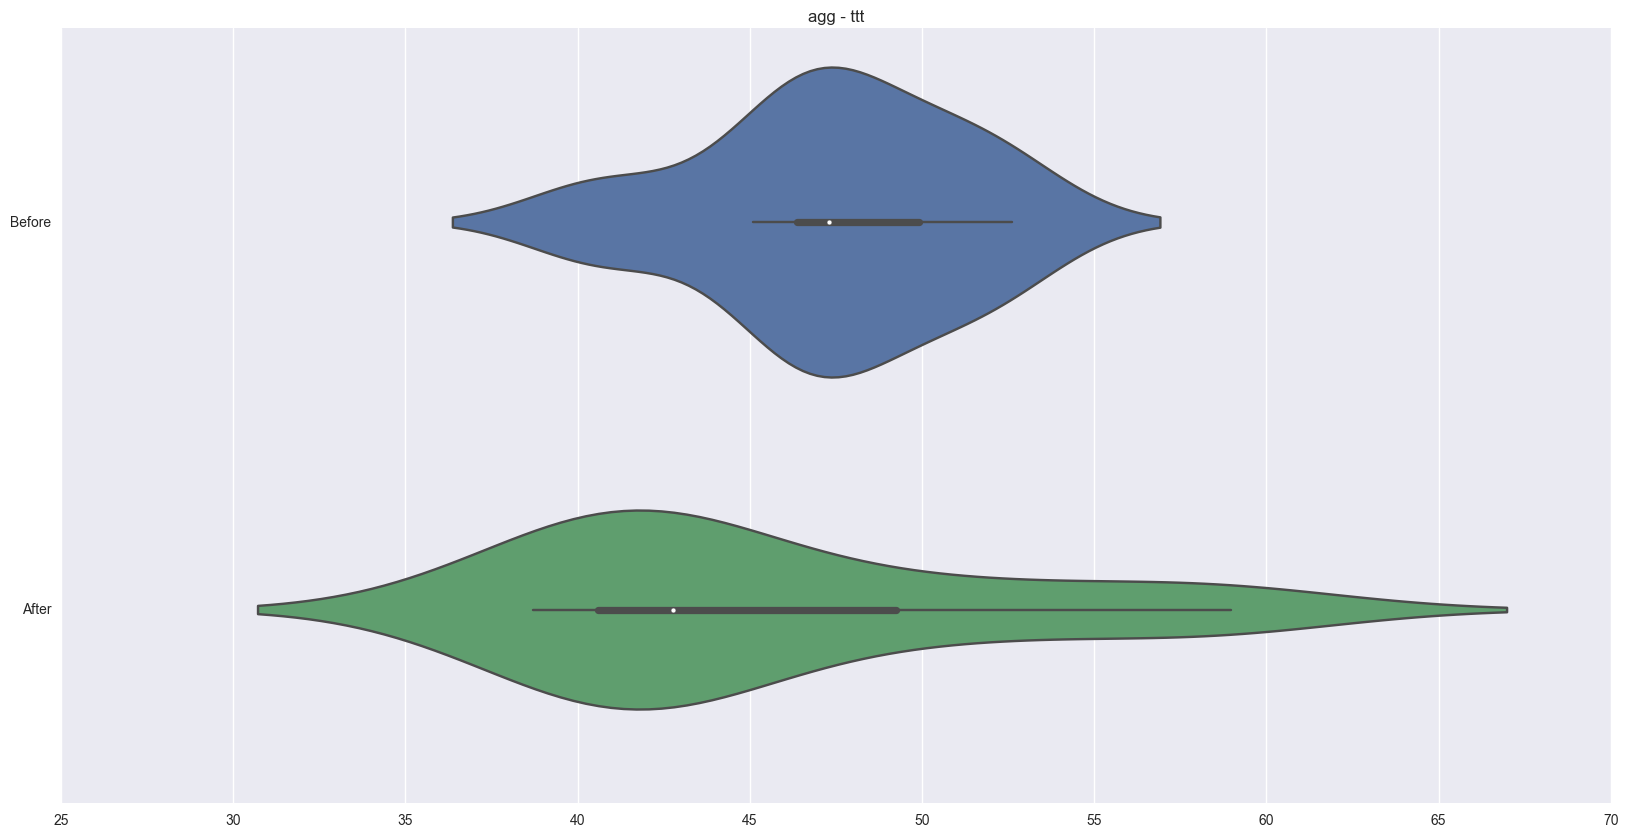

In [38]:
for t, (b, a) in zip(['raw', 'agg'], [[before, after], [before_samp, after_samp]]):
    for metric in ['vtt', 'ptt', 'pttpv', 'ttt']:
        
        if type(b[metric][0]) == list:
            b_met = reduce(lambda x,y: x+y, b[metric])
            a_met = reduce(lambda x,y: x+y, a[metric])
            samp = [b_met, a_met]
            
        else: 
            samp = [b[metric].values, a[metric].values]

        plt.figure(figsize=(20,10))
        sns.violinplot(data=samp, orient='h')
        plt.yticks([0, 1], ['Before', 'After'])
        plt.title(t + ' - ' + metric)
        plt.show()

#### Statistics

In [40]:
# market, metric, before_mu, after_mu, t, p_t, F, p_F, df
summary_table = []

for metric in ['vtt', 'ptt', 'pttpv', 'ttt']:

    # calculate summary stats

    before_mean = np.mean(before_samp[metric])
    after_mean = np.mean(after_samp[metric])

    before_std = np.std(before_samp[metric])
    after_std = np.std(after_samp[metric])

    mu_stats = ttest_ind(before_samp[metric], after_samp[metric], usevar='unequal')

    sigma_stats = levene(before_samp[metric], after_samp[metric])

    all_values = [before_mean, after_mean] + map(float, mu_stats) + [before_std, after_std] + map(float, sigma_stats)

    summary_row = [metric] + all_values

    summary_table.append(summary_row)

In [41]:
sum_cols = ['metric', 'before_mean', 'after_mean', 
            't-score', 'p_t', 'df', 'before_std', 'after_std', 'F', 'p_F']
summary = pd.DataFrame(summary_table, columns=sum_cols)

summary.head()

,metric,before_mean,after_mean,t-score,p_t,df,before_std,after_std,F,p_F
0,vtt,32.160282,34.594483,-1.354395,0.189680,21.491863,3.655109,5.140972,0.129250,0.722230
1,ptt,28.260755,27.493116,0.326475,0.746871,24.200337,5.553923,6.153831,0.075500,0.785749
2,pttpv,15.239961,10.822221,2.981401,0.006418,24.384663,4.136152,3.248969,1.528032,0.227897
3,ttt,47.400243,45.416704,0.947538,0.355746,18.246140,3.508209,6.420680,1.352499,0.255823


In [ ]:
# INSIGNIFICANT FINDINGS

In [33]:
summary.to_csv('Pickup_Logic_Impact.csv', index=False)

In [28]:
# finally close the connection
conn.close()